# Author: Sujay Bashetty

# The Sparks Foundation

## GRIP MAY21 

## Task 1: Supervised Learning

### To train a simple linear regression model on the given dataset 

# Simple Linear Regression 

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##  Importing the dataset

In [3]:
dataset = pd.read_csv('http://bit.ly/w-data')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

###  Describing the Dataset

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
shape=dataset.shape
print("The number of rows and columns ",shape)

The number of rows and columns  (25, 2)


###  Datatypes of columns

In [6]:
dataset.dtypes

Hours     float64
Scores      int64
dtype: object

###  Checking for null values

In [7]:
print(dataset.isnull())

    Hours  Scores
0   False   False
1   False   False
2   False   False
3   False   False
4   False   False
5   False   False
6   False   False
7   False   False
8   False   False
9   False   False
10  False   False
11  False   False
12  False   False
13  False   False
14  False   False
15  False   False
16  False   False
17  False   False
18  False   False
19  False   False
20  False   False
21  False   False
22  False   False
23  False   False
24  False   False


In [8]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [9]:
dataset.iloc[:,1].describe()

count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: Scores, dtype: float64

### Sample of first 5 elements

In [10]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Sample of last 5

In [11]:
dataset.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### Visualisation through Scatter plot

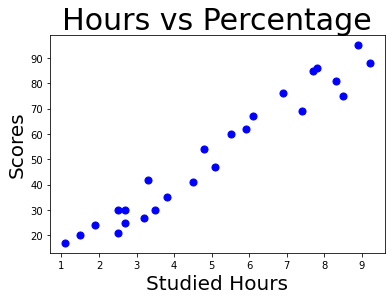

<Figure size 2880x2880 with 0 Axes>

In [12]:
plt.scatter(dataset['Hours'], dataset['Scores'],s=50,c="blue")
plt.title('Hours vs Percentage',fontsize=30)
plt.xlabel('Studied Hours',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.figure(figsize=(40,40))
plt.show()

### Box plot to check outliers 

<AxesSubplot:ylabel='Hours'>

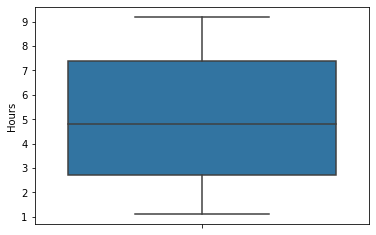

In [13]:
sns.boxplot(y=dataset['Hours'])

## Splitting the dataset into the Training set and Test set 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 0)

### Shapes of new splits 

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20,)
(5, 1)
(5,)


## Training the Simple Linear Regression model on the Training set

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [17]:
y_pred = regressor.predict(X_test)
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Visualising the Training set results 

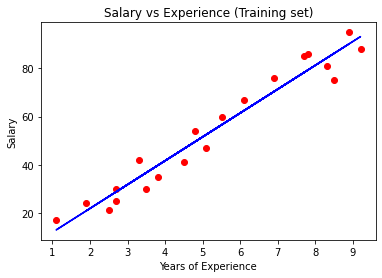

In [18]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results 

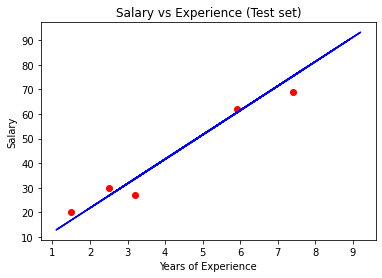

In [19]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

##  Calculating the accuracy

In [20]:
a=regressor.score(X_train,y_train)*100
b=regressor.score(X_test,y_test)*100
print("Training accuracy =",a)
print("Testing accuracy =",b)

Training accuracy = 95.15510725211553
Testing accuracy = 94.54906892105356


### Comparing the actual and predicted values

In [21]:
df=pd.DataFrame({"y_actual":y_test,"y_predicted":y_pred})
df

,y_actual,y_predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Calculating the metrics

In [22]:
from sklearn import metrics
print("Mean Squared Error : ",metrics.mean_squared_error(y_test,y_pred))
print("Mean Absolute Error : ",metrics.mean_absolute_error(y_test,y_pred))
print(" The R squared value is :",regressor.score(X_test,y_test))

Mean Squared Error :  21.5987693072174
Mean Absolute Error :  4.183859899002975
 The R squared value is : 0.9454906892105356


## Predicting the score for 9.25 hrs of study

In [23]:
prediction=regressor.predict([[9.25]])
print("For 9.25 hours of study the student will score : ",prediction[0])

For 9.25 hours of study the student will score :  93.69173248737538


## Thank you!